In [1]:
import requests
import nltk
import nltk.corpus
import bs4
from bs4 import BeautifulSoup

url= "https://www.techadvisor.com/article/724318/best-smartphone.html"

headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'
}

r = requests.get(url,{'headers': headers})

soup = bs4.BeautifulSoup(r.text,'html.parser')

soup.find_all('div',{'class':'product-content'})[1].text

'\nThe regular iPhone 14 is a very minor update over the iPhone 13, so it’s a pleasant surprise that the iPhone 14 Pro is such a leap over its predecessor. Some of the change is only skin deep, but when such a visual overhaul as the Dynamic Island makes its debut, it’s hard not to notice.\nApple has shrunk its famous screen notch into a pill and circular shape below the top bezel but filled in the blank space with black pixels, and then used animations to have notifications and updates from apps originate from the space, creating a use for the cut outs now seen for cameras on most phone screens. It is very clever, and means you can see what music playing, timers, weather and more constantly at the top of the screen without having to hop into the app.\nThe phone’s cameras are also exceptionally good, with the first 48Mp sensor on an iPhone allowing for 2x zoom cropping in addition to the 3x telephoto lens and a capable ultrawide. Apple has also finally introduced an always-on display th

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Define a list of stopwords to remove
stop_words = set(stopwords.words('english'))

# Initialize a Porter stemmer
stemmer = PorterStemmer()

# Get the text content from the scraped HTML
text = soup.find_all('div',{'class':'product-content'})[1].text

# Remove unwanted characters
text = text.replace('\n', ' ').replace('\t', ' ')
text = ' '.join(text.split())

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
tokens = [word.lower() for word in tokens if not word.lower() in stop_words]

# Stem the words
tokens = [stemmer.stem(word) for word in tokens]

# Join the tokens back into a string
processed_text = ' '.join(tokens)

print(processed_text)


regular iphon 14 minor updat iphon 13 , ’ pleasant surpris iphon 14 pro leap predecessor . chang skin deep , visual overhaul dynam island make debut , ’ hard notic . appl shrunk famou screen notch pill circular shape top bezel fill blank space black pixel , use anim notif updat app origin space , creat use cut out seen camera phone screen . clever , mean see music play , timer , weather constantli top screen without hop app . phone ’ camera also except good , first 48mp sensor iphon allow 2x zoom crop addit 3x telephoto len capabl ultrawid . appl also final introduc always-on display simpli dim lock screen pleasingli ’ affect batteri life , test least . ’ huge upgrad 13 pro phone three four year old iphon feel lightyear futur .


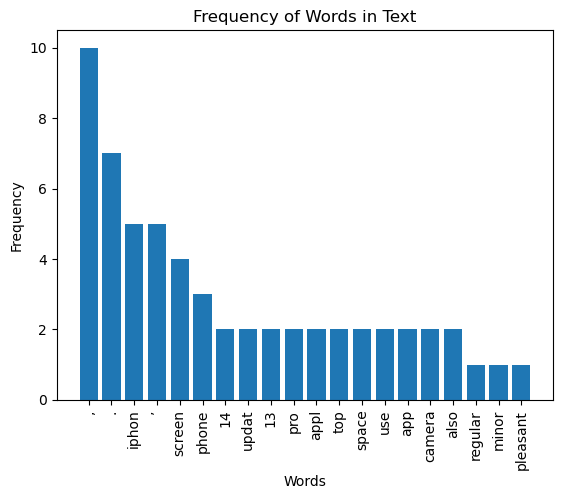

In [3]:
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Get the text content from the scraped HTML
text = soup.find_all('div',{'class':'product-content'})[1].text

# Tokenize the text
tokens = nltk.word_tokenize(processed_text)

# Create a frequency distribution of the tokens
freq_dist = FreqDist(tokens)

# Get the top 20 most frequent words
top_words = freq_dist.most_common(20)

# Create a bar chart of the top 20 most frequent words
x, y = zip(*top_words)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Words in Text')
plt.show()
